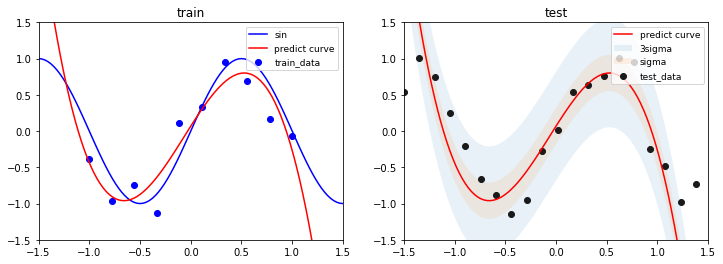

w0: 0.07 w1: 2.20 w2: -0.42 w3: -2.12 

In [255]:
# 最尤推定
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

def Phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    result = np.array([[1, x[0], x[0]**2, x[0]**3] for x in X])
    return result

N = 10
beta = 0.3
np.random.seed(1111)
x = np.linspace(-1,1,N)
t = np.sin(np.pi*np.linspace(-1.5,1.5,100))
y = np.sin(np.pi*x) + np.random.normal(0,beta,N)
x_test = np.linspace(-1.5,1.5,100)
y_test = np.sin(np.pi*x_test) + np.random.normal(0,beta,len(x_test))

# 学習
x = np.array([[i] for i in x])
x_test = np.array([[i] for i in x_test])
y = np.array([[i] for i in y])

w_ML = np.dot(np.dot(np.linalg.inv(np.dot(Phi(x).T, Phi(x))), Phi(x).T), y.ravel())
w_ML = np.array([[w] for w in w_ML])

# テスト
predict = np.dot(w_ML.T, Phi(x_test).T).ravel()
variance_ML = np.sum(np.square(y-np.dot(Phi(x), w_ML))) / N
sigma = np.sqrt(variance_ML)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.linspace(-1.5,1.5,len(t)),t,label='sin',color='b')
ax[0].plot(x_test.ravel(), predict.ravel(),label='predict curve',color='r')
ax[0].scatter(x.ravel(), y, label='train_data',color='b')
ax[1].fill_between(x_test.ravel(), predict+sigma*3, predict-sigma*3, alpha=0.1, label='3sigma')
ax[1].fill_between(x_test.ravel(), predict+sigma, predict-sigma, alpha=0.1, label='sigma')
ax[1].plot(x_test.ravel(), predict.ravel(),label='predict curve',color='r')
ax[1].scatter(x_test.ravel()[::5],y_test[::5], label='test_data',color='0.1')
ax[0].set_title('train')
ax[1].set_title('test')
ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,1.5)
ax[1].set_xlim(-1.5,1.5)
ax[1].set_ylim(-1.5,1.5)
ax[0].legend(loc='upper right',fontsize=9)
ax[1].legend(loc='upper right',fontsize=9)
plt.show()

for i, w in enumerate(w_ML.ravel()):
    print('w{}: {:.2f}'.format(i,w),end=' ')

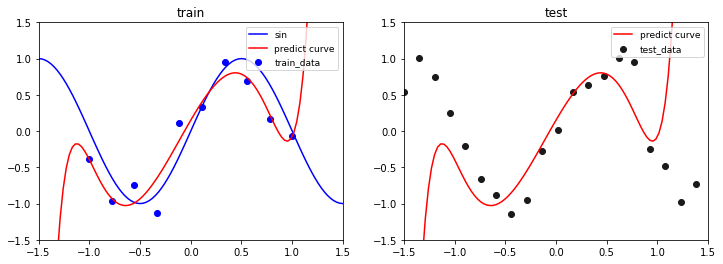

w0: 0.150 w1: 2.394 w2: -0.853 w3: -2.522 w4: -0.247 w5: -0.806 w6: 0.125 w7: 0.304 w8: 0.592 w9: 0.788 

In [274]:
# MAP推定
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    result = np.array([[1, x[0], x[0]**2, x[0]**3, x[0]**4, x[0]**5, x[0]**6, x[0]**7, x[0]**8, x[0]**9] for x in X])
    return result

N = 10
alpha = 0.003 # ハイパーパラメータ
beta = 0.3   # 既知と仮定しています
np.random.seed(1111)
x = np.linspace(-1,1,N)
t = np.sin(np.pi*np.linspace(-1.5,1.5,100))
y = np.sin(np.pi*x) + np.random.normal(0,beta,N)
x_test = np.linspace(-1.5,1.5,100)
y_test = np.sin(np.pi*x_test) + np.random.normal(0,beta,len(x_test))

# 縦ベクトルに変換
x = np.array([[i] for i in x])
x_test = np.array([[i] for i in x_test])

# MAP推定はここが変化するだけ
w_MAP = np.dot(np.dot(np.linalg.inv(np.dot(Phi(x).T, Phi(x))+(alpha/beta)*np.eye(10)), Phi(x).T), y)
w_MAP = np.array([[w] for w in w_MAP])

predict = np.dot(w_MAP.T, Phi(x_test).T).ravel()

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.linspace(-1.5,1.5,len(t)),t,label='sin',color='b')
ax[0].plot(x_test.ravel(), predict.ravel(),label='predict curve',color='r')
ax[0].scatter(x.ravel(), y, label='train_data',color='b')
ax[1].plot(x_test.ravel(), predict.ravel(),label='predict curve',color='r')
ax[1].scatter(x_test.ravel()[::5],y_test[::5], label='test_data',color='0.1')
ax[0].set_title('train')
ax[1].set_title('test')
ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,1.5)
ax[1].set_xlim(-1.5,1.5)
ax[1].set_ylim(-1.5,1.5)
ax[0].legend(loc='upper right',fontsize=9)
ax[1].legend(loc='upper right',fontsize=9)
plt.show()

for i, w in enumerate(w_MAP.ravel()):
    print('w{}: {:.3f}'.format(i,w),end=' ')